# Pregunta 1

Tenemos la ecuación diferencial:

$$ -u'' = 1 + x $$

Con las condiciones de frontera $u(0) = u(1) = 1$.

Por lo que tenemos $f(x) = 1 + x $ y 

$$ \phi_{i}(x) = \left\{ \begin{array}{cc} \frac{x - x_{i-1}}{x_{i} - x_{i-1}} &x_{i-1} \leq x \leq x_{i} \\ -\frac{x_{i+1} - x}{x_{i+1} - x_{i}} &x_{i} \leq x \leq x_{i+1} \end{array} \right. $$

Considerando que $x_{i} = a + i h, \forall i = 0, \ldots, n$ con $h = \frac{b-a}{n}$

Entonces podemos plantear el *load vector* como:

$$ F_{ii} = \int\limits_{(ii-1)h}^{ii\cdot h}(1 + x)\cdot \frac{x - (ii - 1)h}{h} + \int\limits_{ii\cdot h}^{(ii+1)h} (1+x)\cdot\frac{-(x - (ii+1)h)}{h} $$

Para lo cual hemos usado la función `scipy.integrate.quad` de integración numérica. 

Luego debemos procesar la *stiffness matrix* para resolver el sistema $Ku = F$. Esta se puede procesar de la siguiente forma:

$$ K_{i,i} = \frac{2}{h}, \forall i = 1, \ldots, n-1 $$
$$ K_{i,(i+1)} = K_{(i+1),i} = -\frac{1}{h}, \forall i = 1, \ldots, n-2 $$

Finalmente, calculamos $u$ usando la función `numpy.linalg.solve(K,F)`.

0.0 0
0.1 0.056999999999999974
0.2 0.10399999999999994
0.30000000000000004 0.13999999999999993
0.4 0.16399999999999992
0.5 0.1749999999999999
0.6000000000000001 0.17199999999999988
0.7000000000000001 0.1539999999999999
0.8 0.11999999999999993
0.9 0.06899999999999996
1.0 0


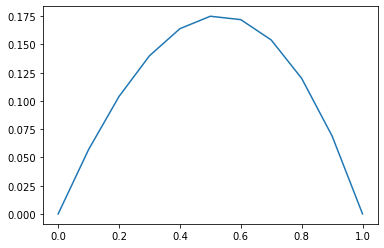

In [2]:
import numpy as np
import scipy.integrate
%matplotlib inline
import matplotlib.pyplot as plt

def f(x):
	return 1 + x

def phif1(x, ii, h):
	return (1 + x) * (x - (ii))

def solve(n):
	h = 1 / n
	F = np.zeros((n-1,1))
	for ii in range(n-1):
		F[ii] = scipy.integrate.quad(lambda x: (1 + x) * (x - ii * h + h) / h , ii * h - h, ii * h)[0] + scipy.integrate.quad(lambda x : (1 + x) * (- (x - ii * h - h) / h), ii * h, ii * h + h)[0]
	k = 1
	K = np.zeros((n-1,n-1))
	for ii in range(n-1):
		K[ii,ii] = 2 * k / h
	for ii in range(n-2):
		K[ii, ii+1] = -k / h
		K[ii+1, ii] = -k / h
	u = np.linalg.solve(K,F)
	return u

n = 10
x = [0 + i * (1.0 / n) for i in range(n+1)]
w = solve(n)
u = [0]
for _ in w:
	u.append(_[0])
u.append(0)
plt.plot(x,u)
plt.show()

# Pregunta 2

Aplicación directa del método de diferencias finitas explicado en el capítulo 8 del libro de Timothy Sauer (2da Edición) tomando como referencia el ejemplo 8.8 y traduciendo el código por completo a Python 3.

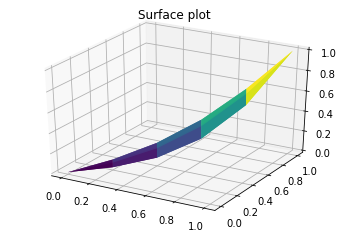

In [11]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def f(x,y):
	return y

def g1(x):
	return x**3

def g2(x):
	return x**3

def g3(y):
	return 0

def g4(y):
	return 1

def poisson(xl, xr, yb, yt, M, N):
	m = M + 1
	n = N + 1
	mn = m * n
	h = (xr - xl) / M
	h2 = h * h
	k = (yt - yb) / N
	k2 = k * k
	x = [i * h + xl for i in range(0,M+1)]
	y = [i * h + yb for i in range(0,N+1)]
	A = np.zeros((mn, mn))
	b = np.zeros((mn))
	for i in range(1,m-1):
		for j in range(2,n):
			A[i + (j - 1) * m, i-1 + (j-1) * m] = A[i + (j-1) * m, i + 1 + (j-1) * m] = 1 / h2
			A[i + (j - 1) * m, i + (j - 1) * m] = -2 / h2 - 2 / k2
			A[i + (j - 1) * m, i + (j - 2) * m] = A[i + (j - 1) * m, i + j * m] = 1 / k2
			b[i + (j - 1) * m] = f(x[i], y[j-1])
	for i in range(m):
		j = 1
		A[i + (j - 1) * m, i + (j - 1) * m] = 1
		b[i + (j - 1) * m] = g1(x[i])
		j = n
		A[i + (j-1) * m, i + (j-1) * m] = 1
		b[i + (j - 1) * m] = g2(x[i])
	for j in range(2,n):
		i = 0
		A[i + (j - 1) * m, i + (j - 1) * m] = 1
		b[i + (j - 1) * m] = g3(y[j-1])
		i = m-1
		A[i + (j - 1) * m, i + (j - 1) * m] = 1
		b[i + (j - 1) * m] = g4(y[j-1])
	v = np.linalg.solve(A, b)
	w = np.reshape(v, (m, n))
	return w

n = 9
m = 9

z = poisson(0,1,0,1,n,m)
h1 = 1.0 / n
h2 = 1.0 / m
x = [i * h1 for i in range(n + 1)]
y = [i * h2 for i in range(m + 1)]
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()